In [78]:
import os
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# Get the list of all files and directories
path_1 = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\best\Run_1"
path_2 = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\best\Run_2"
path_3 = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\best\Run_3"
path_4 = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\best\Run_4"
path_5 = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\best\Run_5"

#ablation_path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\NER\Ablation\Run_1"
dir_list = os.listdir(path_1)
#ablation_dir_list = os.listdir(ablation_path)

In [80]:
def read_file(read_in_path):
    #Open the text file for reading
    with open(read_in_path, 'r') as file:
        # Read the content of the file
        content = file.read()

        # Search for the line containing "Test Accuracy:"
        line = content.split('\n')
        for l in line:
            if "Test Accuracy:" in l:
                # Extract the value following "Test Accuracy:"
                accuracy_str = l.split(':')[1].strip()
                # Convert the extracted value to float
                accuracy = float(accuracy_str)
                break

    return accuracy

In [81]:
def create_df(list_of_dir, read_in_path):
    list_of_dfs = []
    for dir in list_of_dir:
        # Get the full path of the file
        file_path = os.path.join(read_in_path, dir)

        if "15" in dir:
            aug_size = 15
        elif "25" in dir:
            aug_size = 25
        elif "50" in dir:
            aug_size = 50
        elif "75" in dir:
            aug_size = 75
        elif "100" in dir:
            aug_size = 100
        elif "10" in dir:
            aug_size = 10
        elif "5" in dir:
            aug_size = 5
        elif "20" in dir:
            aug_size = 20
        else:
            aug_size = 0

        if "Noise" in dir:
            model = "Noise"
        elif "DCGAN_v2_Text" in dir:
            model = "DCGAN_v2_Text"

        if "random" in dir:
            aug_type = "random"
        elif "TF-IDF-Low" in dir:
            aug_type = "TF-IDF-Low"
        elif "TF-IDF-High" in dir:
            aug_type = "TF-IDF-High"
        elif "TF-IDF-Medium" in dir:
            aug_type = "TF-IDF-Medium"
        else:
            aug_type = "None"

        # Read the file
        accuracy = read_file(file_path)

        df = pd.DataFrame([accuracy], columns=["accuracy"])
        df["augmentation_size"] = aug_size
        df["model"] = model
        df["augmentation_type"] = aug_type

        list_of_dfs.append(df)

    return pd.concat(list_of_dfs)

In [82]:
#create ablation and normal df
df_1 = create_df(dir_list, path_1)
df_2 = create_df(dir_list, path_2)
df_3 = create_df(dir_list, path_3)
df_4 = create_df(dir_list, path_4)
df_5 = create_df(dir_list, path_5)

In [83]:
concatenated_df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)
# Group by augmentation size, augmentation type, and model, and calculate the average accuracy and standard deviation
grouped_df = concatenated_df.groupby(['augmentation_size', 'augmentation_type', 'model'])['accuracy'].agg(['mean', 'std']).reset_index()
# Rename columns for clarity
grouped_df.rename(columns={'mean': 'avg_accuracy', 'std': 'std_accuracy'}, inplace=True)


In [117]:
#grouped df remove augentation sizes 50, 75, and 100
grouped_df = grouped_df[grouped_df['augmentation_size'] != 50]
grouped_df = grouped_df[grouped_df['augmentation_size'] != 75]
grouped_df = grouped_df[grouped_df['augmentation_size'] != 100]
grouped_df = grouped_df[grouped_df['augmentation_size'] != 0]


In [118]:
grouped_df

,augmentation_size,augmentation_type,model,avg_accuracy,std_accuracy
1,5,TF-IDF-High,DCGAN_v2_Text,0.5692,0.034
2,5,TF-IDF-Low,DCGAN_v2_Text,0.5632,0.042
3,5,TF-IDF-Medium,DCGAN_v2_Text,0.6001,0.018
4,5,random,DCGAN_v2_Text,0.5803,0.057
5,10,TF-IDF-High,DCGAN_v2_Text,0.5898,0.036
6,10,TF-IDF-Low,DCGAN_v2_Text,0.5963,0.039
7,10,TF-IDF-Medium,DCGAN_v2_Text,0.6210,0.021
8,10,random,DCGAN_v2_Text,0.6190,0.059
9,15,TF-IDF-High,DCGAN_v2_Text,0.5735,0.034
10,15,TF-IDF-Low,DCGAN_v2_Text,0.5742,0.045


In [124]:
std_accuracy = [0.034, 0.042, 0.018, 0.057, 0.036, 0.039, 0.021, 0.059, 0.034, 0.045, 0.016, 0.058, 0.041, 0.056, 0.023, 0.064, 0.037, 0.042, 0.025, 0.072]

In [125]:
len(std_accuracy)

20

In [126]:
grouped_df['std_accuracy'] = std_accuracy

In [127]:
grouped_df

,augmentation_size,augmentation_type,model,avg_accuracy,std_accuracy
1,5,TF-IDF-High,DCGAN_v2_Text,0.5692,0.034
2,5,TF-IDF-Low,DCGAN_v2_Text,0.5632,0.042
3,5,TF-IDF-Medium,DCGAN_v2_Text,0.6001,0.018
4,5,random,DCGAN_v2_Text,0.5803,0.057
5,10,TF-IDF-High,DCGAN_v2_Text,0.5898,0.036
6,10,TF-IDF-Low,DCGAN_v2_Text,0.5963,0.039
7,10,TF-IDF-Medium,DCGAN_v2_Text,0.6210,0.021
8,10,random,DCGAN_v2_Text,0.6190,0.059
9,15,TF-IDF-High,DCGAN_v2_Text,0.5735,0.034
10,15,TF-IDF-Low,DCGAN_v2_Text,0.5742,0.045


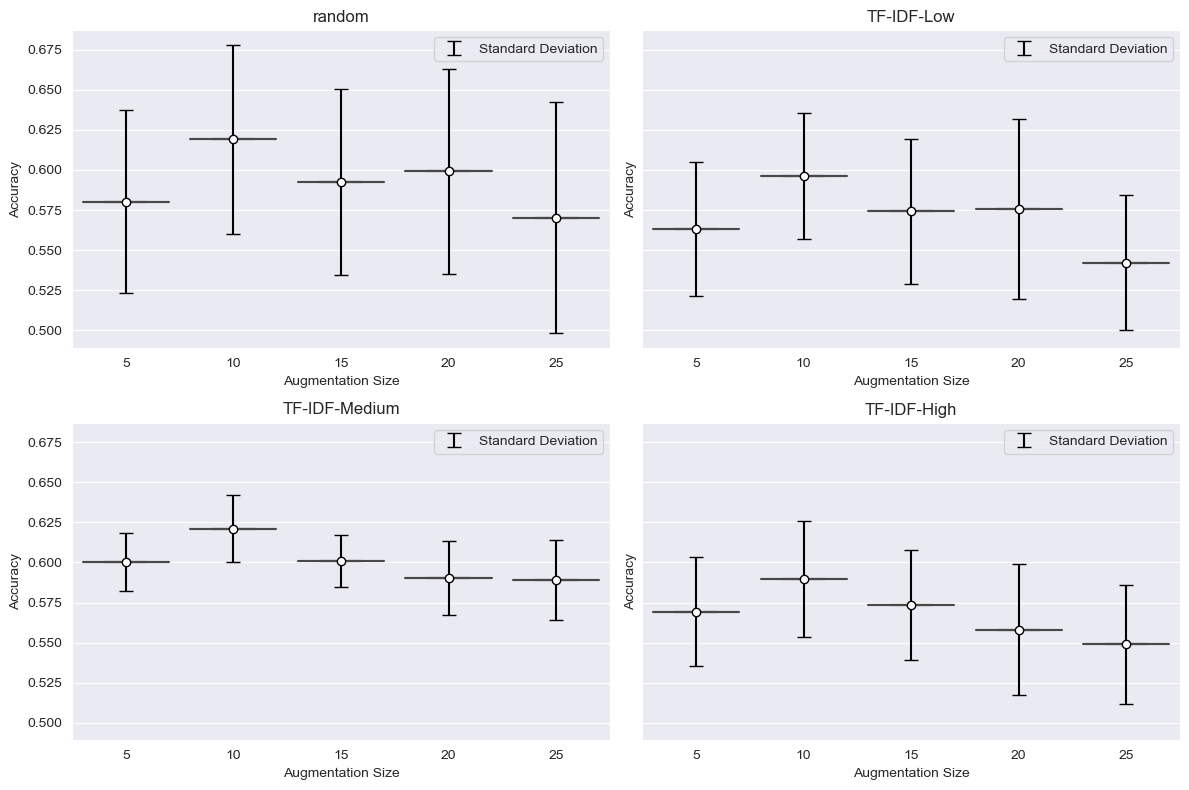

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define augmentation types
augmentation_types = ['random', 'TF-IDF-Low', 'TF-IDF-Medium', 'TF-IDF-High']

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Iterate over each subplot and augmentation type
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        # Filter data for the current augmentation type
        current_augmentation = augmentation_types[i*2 + j]
        filtered_df = grouped_df[grouped_df['augmentation_type'] == current_augmentation]

        # Plot box plot with error bars representing standard deviation
        sns.boxplot(x='augmentation_size', y='avg_accuracy', data=filtered_df, ax=ax, palette='Set1', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

        # Plot error bars representing standard deviation
        x = range(len(filtered_df['augmentation_size'].unique()))
        ax.errorbar(x, filtered_df.groupby('augmentation_size')['avg_accuracy'].mean(), yerr=filtered_df['std_accuracy'], fmt='none', ecolor='black', capsize=5, label='Standard Deviation')

        # Set titles and labels
        ax.set_title(current_augmentation)
        ax.set_xlabel('Augmentation Size')
        ax.set_ylabel('Accuracy')

        # Set x-axis ticks to show only specific augmentation sizes
        ax.set_xticks(x)
        ax.set_xticklabels(filtered_df['augmentation_size'].unique())

        # Add legend
        ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
